# Case Study : Bike Rental Prediction

### Problem Statement:

#### Business Goal

## 1. Imoporting Necessary Libries

In [1]:
# importing neccessary libraries
############################# 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


############################# remove warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Reading Dataset ana Understanding the Data

In [2]:
df = pd.read_csv("day.csv")
#df = pd.read_csv("C:\Users\SHIVJI\Downloads\Bike sharing Assignment\day.csv")   #my computer path name

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# select the specific data type columbs
print("Int Columns : ", len(list(df.select_dtypes(include=['int64']))))
print("Float Columns : ", len(list(df.select_dtypes(include=['float64']))))
print("Object Columns : ", len(list(df.select_dtypes(include=['object']))))

Int Columns :  11
Float Columns :  4
Object Columns :  1


In [9]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Insight: 
* There are no **Null value**  in dataframe and  it contain 730 Rows and 16 Columns
* we need to use **cnt** column for the prediction purpose.
* Total no of int64 dtype columns ,  **11**
* Total no of float64 dtype columns ,  **4**
* Total no of object dtype columns ,  **1**

## 3. Cleaning the Data

##### 1.   Drop unwanted columns that are not necessary

Columns like -

- **instant** -  it is a only instance identifier
- **dteday** - dteday data is already extracted in columns like **mnth**, **yr**, **weekday**
- **casual** and **registered** variables, have a mixed column of casual and registered, column name is **cnt**   

In [10]:
# drop the unnecessary columns
df.drop(columns=["instant","dteday","casual","registered"], inplace=True)

In [11]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [13]:
df.shape

(730, 12)

#### insight

* Shape of the dataframe is reduced, it contain **12 columns** and the original dataframe have **16 columns**

#### 2. Check Null/Missing Value in Dataset

In [14]:
#### Again verify missing values 
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [15]:
# percentage of missing value in each columns 
(df.isnull().sum()/len(df))*100

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

**Insight:**
* There are no **Null value present in entire dataframe** (in each columns and rows)  

#### 3. Duplicate Value Checking 

In [16]:
# Create a dummy variable for duplicate check
df_dup = df

# Checking for duplicates and dropping entire duplicate row if any have
df_dup.drop_duplicates(subset=None, inplace=True)

In [17]:
df.shape

(730, 12)

#### insight

* The shape of the dataframe after running duplicate command is same as drop dataframe

#### 4. Handling Outliers

In [18]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


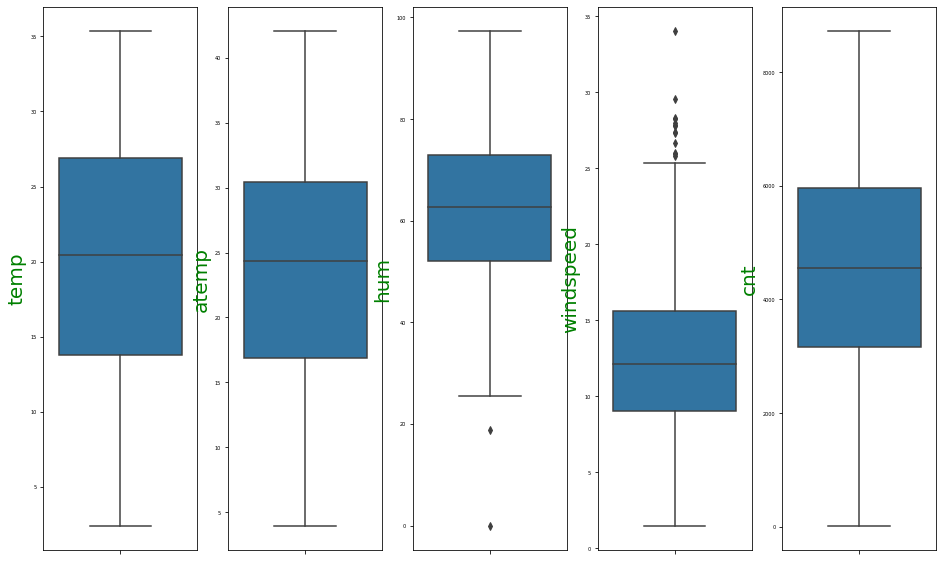

In [19]:
cont_col = ["temp","atemp", "hum","windspeed","cnt"]
cont_col

plt.rcParams["figure.figsize"] = (16,10)

i = 1
for col in cont_col:
    plt.subplot(1,5,i)
    sns.boxplot(y=col, data=df)
    plt.yticks(size=5)
    plt.ylabel(col,fontdict={"size":20, "color":"green"})
    i+=1

**insight**

- From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

## 4. Perform EDA

**1. converting numerical data into categorical data variables**

- season :  (1:spring, 2:summer, 3:fall, 4:winter)
- yr :  (0: 2018, 1:2019)
- mnth :  ( 1 to 12)
- weekday : day of the week
- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [20]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [21]:
# #replacing values
df.season.replace([1,2,3,4],["spring","summer","fall","winter"] , inplace=True)
df.yr.replace([0,1,],[2018,2019], inplace=True)
df.mnth.replace([1,2,3,4,5,6,7,8,9,10,11,12], ["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"],inplace=True)
df.weekday.replace([0,1,2,3,4,5,6],["sun","mon","tue","wed","thu","fri","sat"],inplace=True)
df.weathersit.replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
df.holiday.replace([0, 1],["Holiday", "Workingday"], inplace=True)
df.workingday.replace([0, 1],["Holiday", "Non-Holiday"], inplace=True)

In [22]:
df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,Holiday,mon,Non-Holiday,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,Holiday,tue,Non-Holiday,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801


#### 1. cnt value with time ( Time series Analysis )

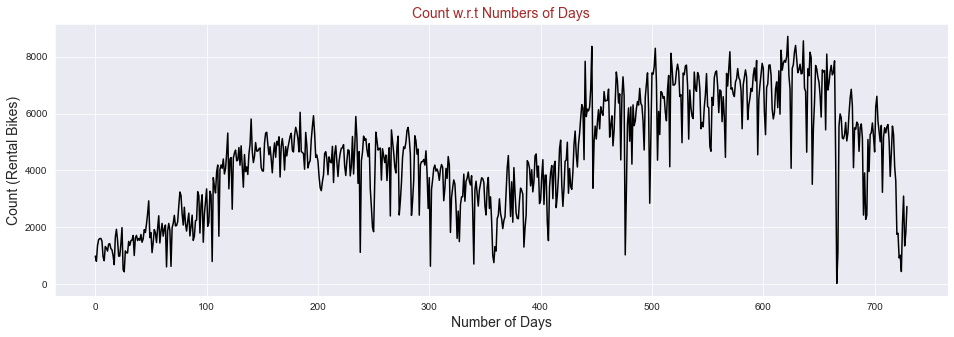

In [23]:
def timeseries(i):
    sns.set_style("darkgrid")
    for i in i:
        plt.figure(figsize=(16,5))
        plt.title("Count w.r.t Numbers of Days",size=14, color="brown")
        plt.xlabel("Number of Days", size=14)
        plt.ylabel("Count (Rental Bikes)", size=14)
        plt.plot(df[i], color="k")
        plt.show()
        
timeseries(["cnt"])

##### 2. Draw pair plots to checking linear relationship


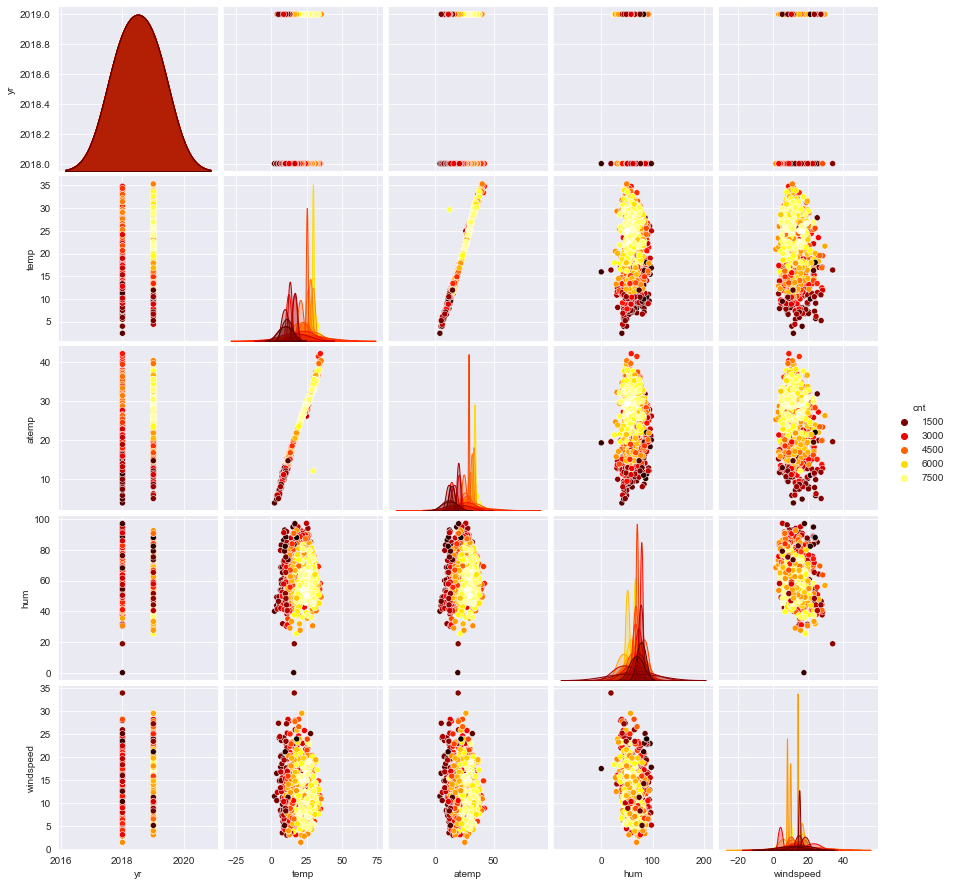

In [24]:
#pairplot for understanding the relation
sns.pairplot(df, hue="cnt",palette='hot')

plt.show()

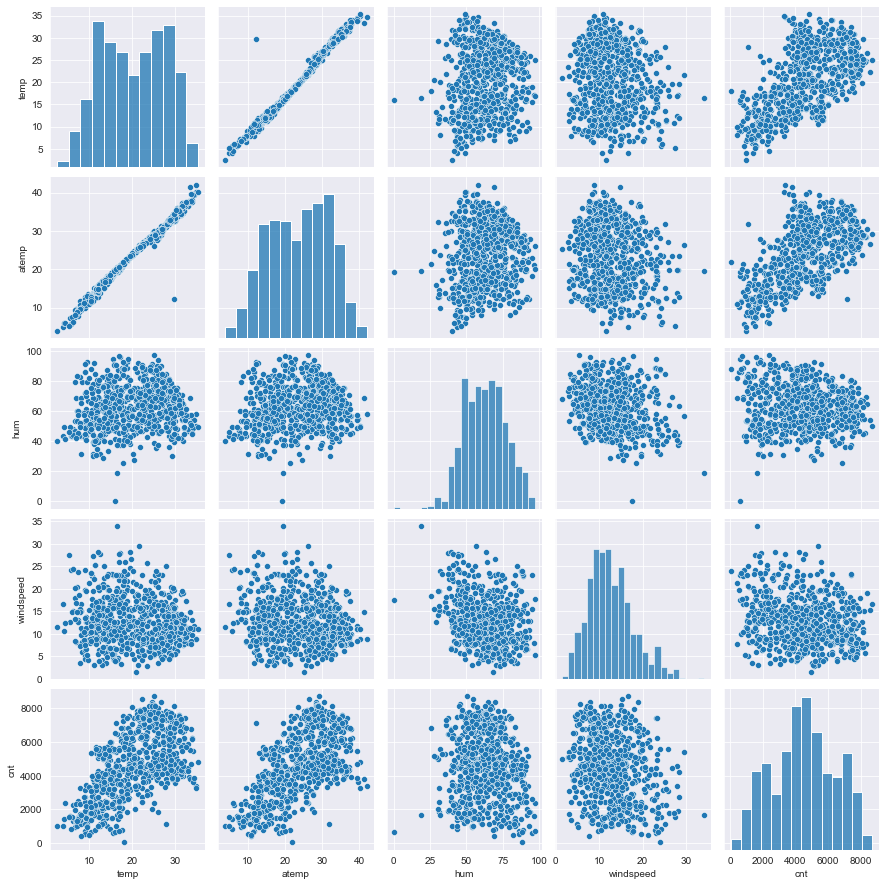

In [25]:
# pairplot for numeriacal value
sns.pairplot(data=df[cont_col])
plt.show()

**insight**
- From the pairplots we can clearly conclude that there is a relation among 'temp', 'atemp' & 'cnt'.

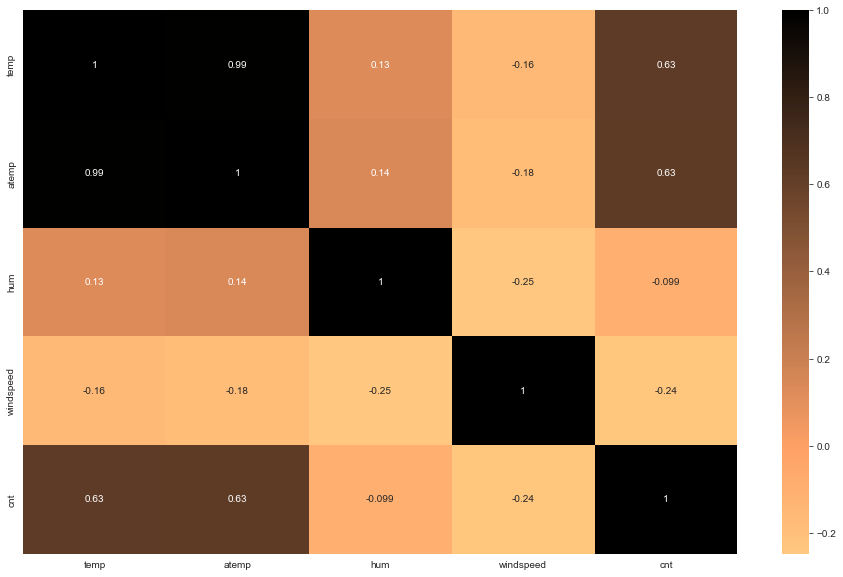

In [26]:
sns.heatmap(df[cont_col].corr(), annot=True, cmap="copper_r")
plt.show()

**insight** 
- Here we can see that **temp** and **atemp** has correlation more than **0.99** means almost **1 (highly correlated)** and atemp seems to be derived from temp so atemp field can be dropped here only

#### 3. Visualising categorical variables using boxplots

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 90.3+ KB


In [28]:
df.weathersit.replace(["Light rain_Light snow_Thunderstorm"],["Light_rain_Light_snow_Thunderstorm"], inplace=True)

In [29]:
df.weathersit.value_counts()

Clear_Few Clouds                      463
Mist_cloudy                           246
Light_rain_Light_snow_Thunderstorm     21
Name: weathersit, dtype: int64

In [30]:
df.workingday.value_counts()

Non-Holiday    504
Holiday        226
Name: workingday, dtype: int64

In [31]:
obj_col = list(df.select_dtypes(include=["object"]))

In [32]:
obj_col

['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

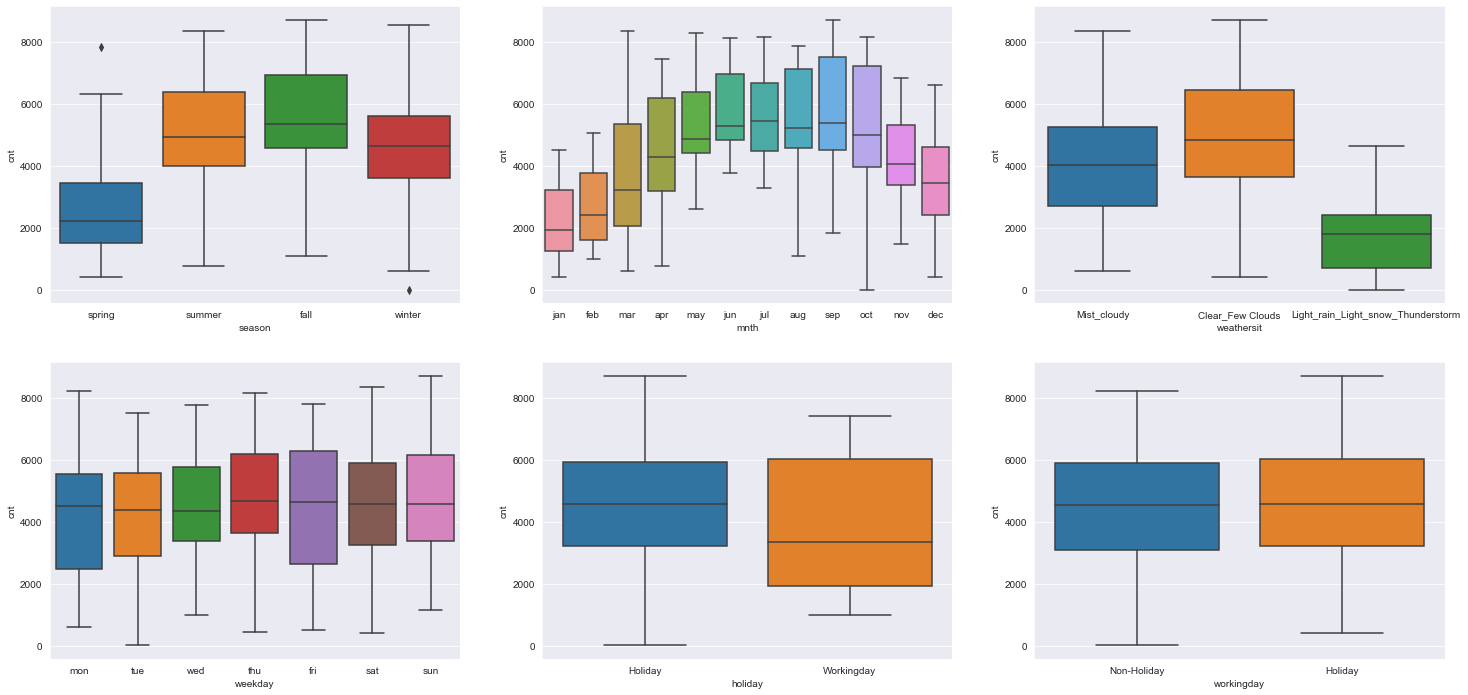

In [33]:
# Building boxplot for each categories using subplots
# using all categories  vs cnt for better understanding

plt.figure(figsize=(25,12))

cat_vars = ["season", "mnth","weathersit","weekday","holiday","workingday"] 

i = 1
for var in cat_vars:
    
    plt.subplot(2,3,i)
    sns.boxplot(x=var, y = "cnt", data=df)
    i+=1
    
plt.savefig("Categorical variables vs cnt plot")

In [34]:
df.workingday.value_counts()

Non-Holiday    504
Holiday        226
Name: workingday, dtype: int64

In [35]:
# df.weathershit.value_counts()
df.weathersit.value_counts()

Clear_Few Clouds                      463
Mist_cloudy                           246
Light_rain_Light_snow_Thunderstorm     21
Name: weathersit, dtype: int64

**insight**


- 1. **season** -  the demand of rental bikes is highest in fall (autumn) season. the demand is 4500+ ( for the 2 Years period only).

- 2. **mnth**   -  the demand of the bikes continusoly increasing upto **july** month, and the highest demand in the **july** and **september** month. After the  **september** month demand of bikes is decreasing

- 3. **weathershit** - clear weathershit has highest demand and lowest demand in the thunderstorm weather.

- 3. **weathershit** - clear weathershit has highest demand and lowest demand in the thunderstorm weather.

- 4. **weekday** - in weekday trend is very closer between 4000 - 5000

- 5. **holiday** - when holiday is occur demand has Increased as compared to Non Holiday.

- 6. **workingday** - maximum booking happening between 4000-5000.

#### 4. ploting a scatter plot

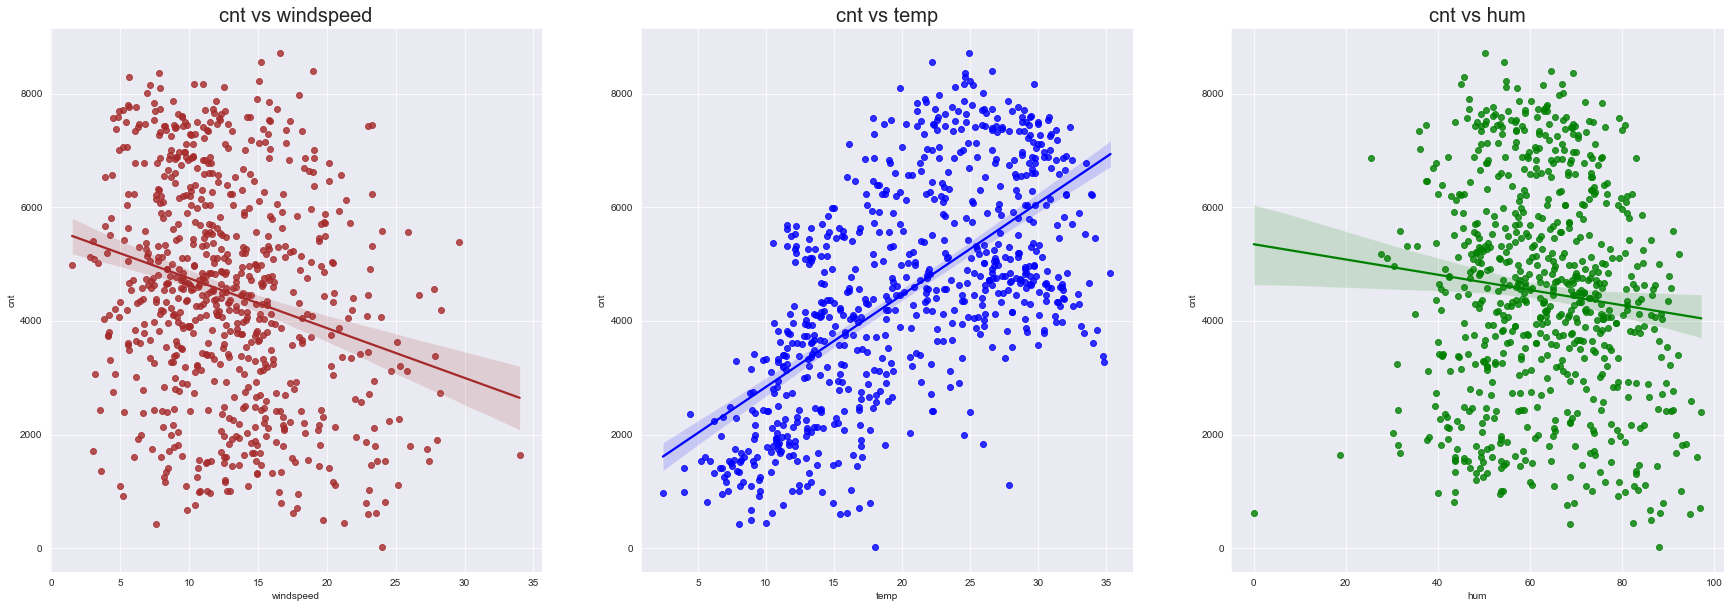

In [36]:
#ploting scatter plot using regression line
# 1. releationship between cnt vs windspeed
# 2. releationship between cnt vs temp
# 3. releationship between cnt vs hum

plt.figure(figsize=(30,10))

plt.subplot(1, 3 , 1)
plt.title("cnt vs windspeed", size=20)
sns.regplot(data=df, x="windspeed", y="cnt",color="brown")

plt.subplot(1, 3 , 2)
plt.title("cnt vs temp", size=20)
sns.regplot(data=df, x="temp", y="cnt",color="b")

plt.subplot(1, 3 , 3)
plt.title("cnt vs hum", size=20)
sns.regplot(data=df, x="hum", y="cnt",color="g" )

plt.show()

**insight**

* In Plot 1 

i) count (cnt) is decreasing with increasing in windspeed   
ii) windspeed value is more scatterd around

* In Plot 2 

i) cnt is giving linear relationship with temp 
ii) count increasing when temp is increasing
iii)  cnt is less scatter than ohters two

* In Plot 3 

i) cnt is decreasing with increasing in humidity.    
ii) humidity value are more scattered

## 5 Data Preprations 

In [37]:
#for showing all columns name
pd.options.display.max_columns = None

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 90.3+ KB


#### 1. Creating Dummy variables for categorical data 

In [39]:
# new dataframe for prevent the data loss
bike = df

# there are three things 
# 1. Creating dummy variables
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.
bike_df = pd.get_dummies(bike, columns=["season", "mnth","weathersit","yr","weekday","holiday","workingday"],drop_first=True)
bike_df.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_Light_rain_Light_snow_Thunderstorm,weathersit_Mist_cloudy,yr_2019,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,holiday_Workingday,workingday_Non-Holiday
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
bike_df.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'mnth_sep', 'weathersit_Light_rain_Light_snow_Thunderstorm',
       'weathersit_Mist_cloudy', 'yr_2019', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'holiday_Workingday', 'workingday_Non-Holiday'],
      dtype='object')

In [41]:
# information after creating dummy variable

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   temp                                           730 non-null    float64
 1   atemp                                          730 non-null    float64
 2   hum                                            730 non-null    float64
 3   windspeed                                      730 non-null    float64
 4   cnt                                            730 non-null    int64  
 5   season_spring                                  730 non-null    uint8  
 6   season_summer                                  730 non-null    uint8  
 7   season_winter                                  730 non-null    uint8  
 8   mnth_aug                                       730 non-null    uint8  
 9   mnth_dec                                       730 non

# 6. Model Building

In [42]:
import sklearn as sk
# [x for x in dir(sk.feature_selection)]

In [43]:
# SCIKIT LIBRARIES

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# stats model library
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:

#shape of dataset before spiliting 
bike_df.shape

(730, 30)

### 1. Split Data into training and test 

In [45]:
# y to contain target variable, dependent variable
y = bike_df.pop("cnt")

# all remaining variable also our independent variables
x = bike_df

In [46]:
x.columns.tolist()

['temp',
 'atemp',
 'hum',
 'windspeed',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_aug',
 'mnth_dec',
 'mnth_feb',
 'mnth_jan',
 'mnth_jul',
 'mnth_jun',
 'mnth_mar',
 'mnth_may',
 'mnth_nov',
 'mnth_oct',
 'mnth_sep',
 'weathersit_Light_rain_Light_snow_Thunderstorm',
 'weathersit_Mist_cloudy',
 'yr_2019',
 'weekday_mon',
 'weekday_sat',
 'weekday_sun',
 'weekday_thu',
 'weekday_tue',
 'weekday_wed',
 'holiday_Workingday',
 'workingday_Non-Holiday']

In [47]:
x

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_Light_rain_Light_snow_Thunderstorm,weathersit_Mist_cloudy,yr_2019,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,holiday_Workingday,workingday_Non-Holiday
0,14.110847,18.18125,80.5833,10.749882,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
1,14.902598,17.68695,69.6087,16.652113,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,8.200000,10.60610,59.0435,10.739832,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,9.305237,11.46350,43.6957,12.522300,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
726,10.386653,12.75230,59.0000,10.416557,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0
727,10.386653,12.12000,75.2917,8.333661,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
728,10.489153,11.58500,48.3333,23.500518,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


In [48]:
# Now creating train, test data frame with 70:30 Ratio 
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, train_size=0.7, random_state=100)

In [49]:
# checking the shape of data frame 
display(X_train.shape)

(510, 29)

In [50]:
# checking the shape of data frame
display(X_test.shape)

(219, 29)

In [51]:
# describe the X_train
print(X_train.describe())

             temp       atemp         hum   windspeed  season_spring  \
count  510.000000  510.000000  510.000000  510.000000     510.000000   
mean    20.102429   23.493909   63.112926   12.831318       0.243137   
std      7.431169    8.090038   14.156632    5.291832       0.429398   
min      2.424346    3.953480    0.000000    2.834381       0.000000   
25%     13.606865   16.603063   52.270825    9.041918       0.000000   
50%     20.209597   24.020400   63.437500   12.083182       0.000000   
75%     26.615847   30.177700   73.250025   15.750879       0.000000   
max     35.328347   42.044800   97.041700   34.000021       1.000000   

       season_summer  season_winter    mnth_aug    mnth_dec    mnth_feb  \
count     510.000000      510.00000  510.000000  510.000000  510.000000   
mean        0.245098        0.24902    0.096078    0.084314    0.066667   
std         0.430568        0.43287    0.294988    0.278131    0.249689   
min         0.000000        0.00000    0.000000    

In [52]:
# describe the X_test
print(X_test.describe())

             temp       atemp         hum   windspeed  season_spring  \
count  219.000000  219.000000  219.000000  219.000000     219.000000   
mean    20.815737   24.255828   61.961883   12.600130       0.255708   
std      7.689600    8.299641   14.456669    4.984858       0.437258   
min      3.957390    4.941955   25.416700    1.500244       0.000000   
25%     14.093750   17.085500   51.166700    9.021282       0.000000   
50%     20.807500   24.873150   60.916700   12.167200       0.000000   
75%     27.401653   31.155725   72.192050   15.395629       1.000000   
max     34.815847   41.318550   97.250000   27.999836       1.000000   

       season_summer  season_winter    mnth_aug    mnth_dec    mnth_feb  \
count     219.000000     219.000000  219.000000  219.000000  219.000000   
mean        0.264840       0.232877    0.059361    0.086758    0.100457   
std         0.442259       0.423633    0.236840    0.282125    0.301297   
min         0.000000       0.000000    0.000000    

**insight**

- After the splitting the data shape of the dataframe is **changed**
- Dataset is divided into **70:30** ratio

## 2. Feature Scaling 

- to make all features in same scale to interpret easily variables.


#### 1. Using min max scaling

In [53]:
# creating an object of scaler for rescaling the important numerical feature like temp, atemp, hum, windspeed,cnt

num_vars = ["temp","atemp","hum","windspeed"]

# use Normalized scaler to scale
scaler = MinMaxScaler()

# Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [54]:
X_train.head()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_Light_rain_Light_snow_Thunderstorm,weathersit_Mist_cloudy,yr_2019,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,holiday_Workingday,workingday_Non-Holiday
653,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
576,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
426,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
728,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
482,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0


#### Building a linear model 

In [55]:
# Building a linear Regression model using sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### eleminate some columns using RFE approach

In [56]:
#using rfe for 15 variables
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [57]:
# selected columns by RFE and their weights
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 7),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sep', True, 1),
 ('weathersit_Light_rain_Light_snow_Thunderstorm', True, 1),
 ('weathersit_Mist_cloudy', True, 1),
 ('yr_2019', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 11),
 ('holiday_Workingday', True, 1),
 ('workingday_Non-Holiday', False, 3)]

In [58]:
# to check supporting column and unsupporting columns using by the model rfe.support

print("Supportable columns - ", X_train.columns[rfe.support_].tolist())

print()

print("Unsupportable columns - ", X_train.columns[~rfe.support_])

Supportable columns -  ['temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sep', 'weathersit_Light_rain_Light_snow_Thunderstorm', 'weathersit_Mist_cloudy', 'yr_2019', 'holiday_Workingday']

Unsupportable columns -  Index(['atemp', 'mnth_aug', 'mnth_feb', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'workingday_Non-Holiday'],
      dtype='object')


In [59]:
# creating X_test dataframe with RFE selected variables
col = X_train.columns[rfe.support_]

X_train_rfe = X_train[col]

In [60]:
X_train_rfe

,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_dec,mnth_jan,mnth_jul,mnth_nov,mnth_sep,weathersit_Light_rain_Light_snow_Thunderstorm,weathersit_Mist_cloudy,yr_2019,holiday_Workingday
653,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,1,0
576,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0,1,0
426,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,1,0
728,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,1,0
482,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.824514,0.605840,0.355596,0,1,0,0,0,0,0,0,0,1,1,0
578,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0,0,1,0
53,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0,0,0,0
350,0.248216,0.577930,0.431816,0,0,1,1,0,0,0,0,0,1,0,0


## 4. Model Building

### Model 1 

**VIF Check**

- VIF equal to 1 = variables are not correlated
- VIF between 1 and 5 = variables are moderately correlated 
- VIF greater than 5 = variables are highly correlated

In [61]:
# checking VIF values of feature variables
# create a dataframe that will contain the names of all feature and their respective VIF valeus

vif = pd.DataFrame()
vif["features"] = X_train_rfe.columns
vif["vif"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif["vif"] = round(vif["vif"], 2)
vif = vif.sort_values(by="vif", ascending=False)
vif

,features,vif
1,hum,30.94
0,temp,17.80
2,windspeed,4.72
3,season_spring,4.37
5,season_winter,4.06
4,season_summer,2.81
12,weathersit_Mist_cloudy,2.32
13,yr_2019,2.09
9,mnth_nov,1.83
7,mnth_jan,1.75


In [62]:
# adding a constant 
X_train_sm1  = sm.add_constant(X_train_rfe)

#using OLS create a fitted model
lr_model1 = sm.OLS(y_train, X_train_sm1).fit()

#Summary of model
print(lr_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          3.34e-189
Time:                        14:15:26   Log-Likelihood:                -4111.1
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     494   BIC:                             8322.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

##### We will remove variable as below combination
- High P , High VIF
- High P , Low VIF
- Low P , High VIF

##### We will remove variable as below combination
- High P , High VIF
- High P , Low VIF
- Low P , High VIF

#### Model 2 

In [63]:
# the column "hum" has high VIF value with negative coefficient
X_train_new = X_train_rfe.drop("hum", axis=1)

**Checking VIF**

In [64]:
# checking VIF values of feature variables
#create a dataframe that wil contain the names of all features variablea and their respective VIF values

vif = pd.DataFrame()
vif["features"] = X_train_new.columns
vif["vif"] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif["vif"] = round(vif["vif"] , 2)
vif = vif.sort_values(by= "vif", ascending = False)
vif

,features,vif
0,temp,5.17
1,windspeed,4.67
4,season_winter,2.94
2,season_spring,2.89
3,season_summer,2.23
12,yr_2019,2.07
8,mnth_nov,1.80
6,mnth_jan,1.66
7,mnth_jul,1.59
11,weathersit_Mist_cloudy,1.56


In [65]:
# adding constant
X_train_sm2 = sm.add_constant(X_train_new)

# building a fitted model 
lr_model2 = sm.OLS(y_train, X_train_sm2).fit()

# summary of model
print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          1.57e-186
Time:                        14:15:26   Log-Likelihood:                -4120.2
No. Observations:                 510   AIC:                             8270.
Df Residuals:                     495   BIC:                             8334.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

**Model 3**

In [66]:
# column season_summer have high p value and VIF value which is insignificant we drop it
X_train_new = X_train_new.drop("season_summer",axis=1)

In [67]:
#checking VIF of feature variables
vif = pd.DataFrame()
vif["features"] = X_train_new.columns
vif["vif"] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif["vif"] = round(vif["vif"], 2)
vif = vif.sort_values(by = "vif", ascending=False)
vif

,features,vif
0,temp,4.67
1,windspeed,4.05
3,season_winter,2.54
2,season_spring,2.36
11,yr_2019,2.06
7,mnth_nov,1.80
5,mnth_jan,1.65
10,weathersit_Mist_cloudy,1.53
4,mnth_dec,1.46
6,mnth_jul,1.36


In [68]:
# adding new constant 
X_train_sm3 = sm.add_constant(X_train_new)

# Create a fitted model
lr_model3 = sm.OLS(y_train, X_train_sm3).fit()

#summary of model
print(lr_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          1.08e-186
Time:                        14:15:27   Log-Likelihood:                -4122.5
No. Observations:                 510   AIC:                             8273.
Df Residuals:                     496   BIC:                             8332.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

**Model 4**

In [69]:
# drop the column mnth_nov beacuase it have high p-value
X_train_new = X_train_new.drop("mnth_nov", axis=1)

In [70]:
#checking VIF of feature variables
vif = pd.DataFrame()
vif["features"] = X_train_new.columns
vif["vif"] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif["vif"] = round(vif["vif"], 2)
vif = vif.sort_values(by = "vif", ascending=False)
vif

,features,vif
0,temp,4.63
1,windspeed,4.00
2,season_spring,2.36
10,yr_2019,2.06
3,season_winter,1.64
5,mnth_jan,1.64
9,weathersit_Mist_cloudy,1.53
6,mnth_jul,1.36
4,mnth_dec,1.29
7,mnth_sep,1.20


In [71]:
# adding new constant 
X_train_sm4 = sm.add_constant(X_train_new)

# Create a fitted model
lr_model4 = sm.OLS(y_train, X_train_sm4).fit()

#summary of model
print(lr_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          2.02e-186
Time:                        14:15:27   Log-Likelihood:                -4126.0
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     497   BIC:                             8333.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

**Model 5**

In [72]:
# removing mnth_dec due to high p value
X_train_new = X_train_new.drop("mnth_dec", axis=1)

In [73]:

#creating dataframe and checking vif
vif = pd.DataFrame()
vif["features"] = X_train_new.columns
vif["vif"] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif["vif"] = round( vif["vif"],2 )
vif= vif.sort_values("vif", ascending=False)
vif

,features,vif
0,temp,4.63
1,windspeed,4.00
2,season_spring,2.25
9,yr_2019,2.06
4,mnth_jan,1.60
8,weathersit_Mist_cloudy,1.53
3,season_winter,1.40
5,mnth_jul,1.36
6,mnth_sep,1.20
7,weathersit_Light_rain_Light_snow_Thunderstorm,1.08


In [74]:
#adding new constant
X_train_sm5 = sm.add_constant(X_train_new)

#created a fitted model
lr_model5 = sm.OLS(y_train, X_train_sm5).fit()


#summary
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          1.13e-186
Time:                        14:15:28   Log-Likelihood:                -4128.2
No. Observations:                 510   AIC:                             8280.
Df Residuals:                     498   BIC:                             8331.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          2331.5423    213.001     10.946      0.000    1913.052    2750.033
temp                                           3767.6442    272.689     13.817      0.000    3231.882    4303.406
windspeed                                     -1288.5515    219.777     -5.863      0.000   -1720.355    -856.748
season_spring                                  -880.8338    136.383     -6.459      0.000   -1148.791    -612.877
season_winter                                   375.7637    108.540      3.462      0.001     162.512     589.016
mnth_jan                                       -371.0545    155.776     -2.382      0.018    -677.114     -64.995
mnth_jul                                       -602.0443    151.773     -3.967      0.000    -900.239    -303.849
mnth_sep                                        509.8020    137.401      3.710      0.000     239.846     779.758
weathersit_Light_rain_Light_snow_Thunderstorm -2500.5644    215.543    -11.601      0.000   -2924.049   -2077.080
weathersit_Mist_cloudy                         -696.8636     76.527     -9.106      0.000    -847.219    -546.508
yr_2019                                        2041.2947     71.810     28.426      0.000    1900.206    2182.383
holiday_Workingday                             -849.4832    227.269     -3.738      0.000   -1296.007    -402.959
==============================================================================
Omnibus:                       58.998   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.235
Skew:                          -0.614   Prob(JB):                     5.83e-31
Kurtosis:                       5.246   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model 6**

In [75]:
#column mnth_jan has very high p value so we drop it
X_train_new = X_train_new.drop("mnth_jan",1)

In [76]:
#creating dataframe and checking vif
vif = pd.DataFrame()
vif["features"] = X_train_new.columns
vif["vif"] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif["vif"] = round( vif["vif"],2 )
vif= vif.sort_values("vif", ascending=False)
vif

,features,vif
0,temp,4.60
1,windspeed,4.00
8,yr_2019,2.06
2,season_spring,1.65
7,weathersit_Mist_cloudy,1.51
3,season_winter,1.40
4,mnth_jul,1.35
5,mnth_sep,1.20
6,weathersit_Light_rain_Light_snow_Thunderstorm,1.08
9,holiday_Workingday,1.04


In [77]:
# adding a constant
X_train_sm6 = sm.add_constant(X_train_new)

# creating a fitted model
lr_model6 = sm.OLS(y_train, X_train_sm6).fit()

#model sujmary
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          1.16e-186
Time:                        14:15:28   Log-Likelihood:                -4131.1
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     499   BIC:                             8331.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          2211.5088    207.921     10.636      0.000    1803.001    2620.017
temp                                           3924.0505    265.901     14.758      0.000    3401.626    4446.475
windspeed                                     -1215.2874    218.630     -5.559      0.000   -1644.837    -785.738
season_spring                                  -963.0264    132.562     -7.265      0.000   -1223.475    -702.577
season_winter                                   410.9381    108.033      3.804      0.000     198.683     623.193
mnth_jul                                       -632.0765    151.955     -4.160      0.000    -930.628    -333.525
mnth_sep                                        501.5708    137.999      3.635      0.000     230.440     772.701
weathersit_Light_rain_Light_snow_Thunderstorm -2489.4610    216.499    -11.499      0.000   -2914.823   -2064.099
weathersit_Mist_cloudy                         -705.2053     76.804     -9.182      0.000    -856.105    -554.306
yr_2019                                        2034.7238     72.093     28.224      0.000    1893.081    2176.366
holiday_Workingday                             -856.6467    228.311     -3.752      0.000   -1305.216    -408.078
==============================================================================
Omnibus:                       58.020   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.195
Skew:                          -0.601   Prob(JB):                     9.80e-31
Kurtosis:                       5.249   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

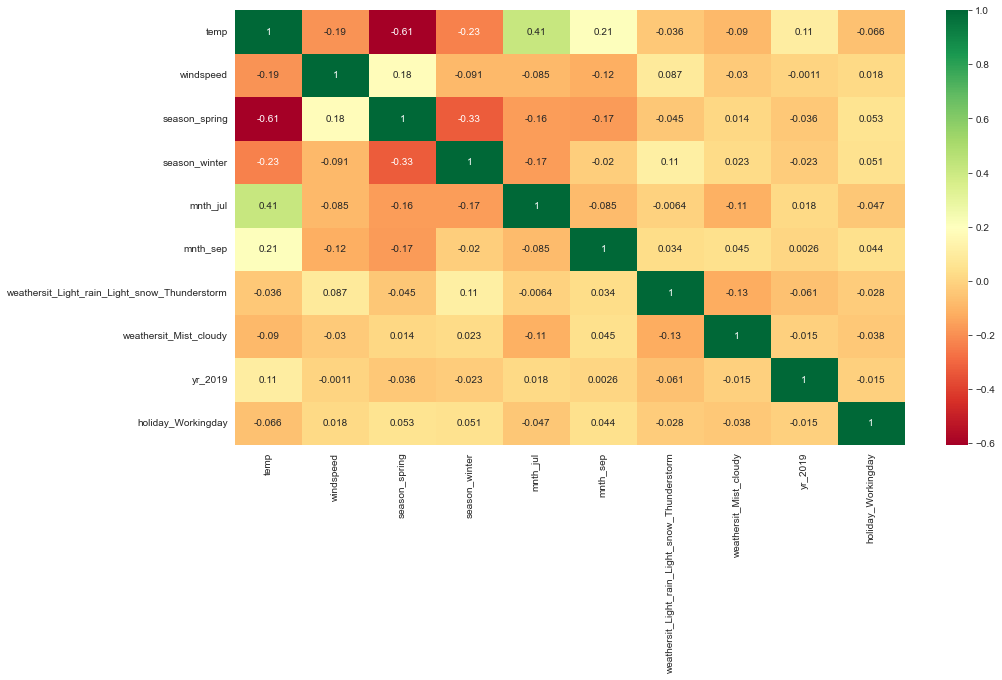

In [78]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

**Insight**

* This model (**Model no- 6** ) is ***very good***, as there are seems to be very   low multicollinearity between the predictor and the p_values for all predictors seem to be signigficant.

* this model have ~0 in  ***p-vlaue*** in any varible
* in this model 


## 7. Final model Interpretation

___________________________
##### 1. Model statistic is  

* r2 : **83.3**
* adjusted r2 : **83**
* F-Statistic : **248.7**
* Prob (F-statistic):	**1.16e-186**

##### 2. Final Model coefficient values

- const	     : 2211.5088	
- temp	     : 3924.0505	
- windspeed	 : -1215.2874	
- season_spring	: -963.0264	
- season_winter	: 410.9381	
- mnth_jul   :	-632.0765	
- mnth_sep   :	501.5708
- weathersit_Light_rain_Light_snow_Thunderstorm :	-2489.4610	
- weathersit_Mist_cloudy :	-705.2053	
- yr_2019    :	2034.7238
- holiday_Workingday  :	-856.6467


**3. Best fit line**

The equation of best fitted surface based on model 7:

cnt = 2211.5088 + (holiday_Workingday × -856.6467) + (temp × 3924.0505) + (season_spring × -963.0264) + (season_winter × 410.9381) + (mnth_jul ×  -632.0765) + (mnth_sep × 501.5708) + (weathersit_light_rain_light_thunderstrom ×  -2489.4610) + (weathersit_misty_cloudy ×  -705.2053) + (yr_2019 × 2034.7238)

**4. Interpretation of coefficients**

* **const** : The Constant value of  2211.5088 indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by  2211.5088 units.

* **holiday_Workingday** : A coefficient value of -856.6467 indicated that a unit decrease in holiday variable, decrease the bike hiring numbers by -856.6467 units.


* **temp** : A coefficient value of 3924.0505 indicated that a unit increase in temp variable, increases the bike hire numbers by 3924.0505 units.

* **season_spring** : A coefficient value of -963.0264 indicated that a unit decrease in season_spring variable decrease the bike hire numbers by -963.0264 units.

* **season_winter** : A coefficient value of 410.9381 indicated that w.r.t season_spring, a unit increase in season_winter variable increases the bike hire numbers by 410.9381 units.

* **mnth_jul**: A coefficient value of  -632.0765 indicated that w.r.t mnth_jan, a unit decrease in mnth_jul variable decreases the bike hire numbers by  -632.0765 units.

* **mnth_sep** : A coefficient value of  501.5708 indicated that w.r.t mnth_jan, a unit increase in mnth_sep variable slightly increases the bike hire numbers by  501.5708 units.

* **weathersit_light_rain_light_thunderstrom** : A coefficient value of -2489.4610 indicated that, w.r.t Weathersit_misty_cloud, a unit increase in Weathersit_clear_few_cloud variable, decreases the bike hire numbers by -2489.4610 units.

* **weathersit_misty_cloud** : A coefficient value of -705.2053 indicated that, w.r.t seasons, a unit decrease in Weathersit_clear_few_cloud variable, decreases the bike hire numbers by -705.2053 units.

* **yr_2019** : A coefficient value of 2034.7238 indicated that a unit increase in yr_2019 variable, increases the bike hire numbers by 2034.7238 units. 

## 8. Assumptions

**1. Residual Analysis**

In [79]:
# predict the value
y_train_pred = lr_model6.predict(X_train_sm6)

In [80]:
y_train_pred

653    6292.440581
576    6491.249700
426    4003.659037
728    3439.130408
482    4864.590166
          ...     
526    6344.309761
578    7409.075769
53     1908.209686
350    2366.474634
79     2677.861776
Length: 510, dtype: float64

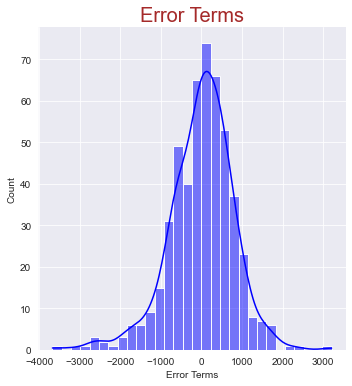

In [81]:
# ploting histogram of error terms
res = y_train - y_train_pred

sns.displot(res, kde=True,color="blue")
plt.title("Error Terms", size=20 ,c="brown")
plt.xlabel("Error Terms", size=10)
plt.ylabel("Count", size=10 )


plt.show()

**insight**

- In this Histogram plot, the Residuals are **normally distributed**. Hence our assumption for Linear Regression is **valid**.

**2. Multicollinearity check**


In [82]:
#creating dataframe and checking vif
vif = pd.DataFrame()
vif["features"] = X_train_new.columns
vif["vif"] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif["vif"] = round( vif["vif"],2 )
vif= vif.sort_values("vif", ascending=False)
vif

,features,vif
0,temp,4.60
1,windspeed,4.00
8,yr_2019,2.06
2,season_spring,1.65
7,weathersit_Mist_cloudy,1.51
3,season_winter,1.40
4,mnth_jul,1.35
5,mnth_sep,1.20
6,weathersit_Light_rain_Light_snow_Thunderstorm,1.08
9,holiday_Workingday,1.04


**insight**

- From VIF, we can see that there is **very low multicollinearity** existing between the predictor variables, as all the values are within **permissible range** of below 5

**3. Actual vs Predicted**

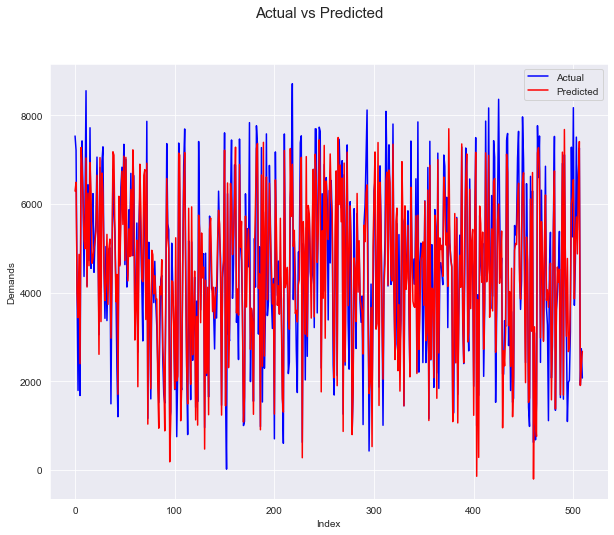

In [83]:
# actual vs predicted plot
plt.rcParams["figure.figsize"] = (10,8)
c = [i for i in range(0, len(X_train_new), 1)]
plt.plot(c, y_train, color="b")
plt.plot(c, y_train_pred, color="r")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.legend(["Actual","Predicted"])
plt.show()

**insight**

- Actual and Predicted values appears approximately same.

**4. QQ plot**

<Figure size 288x288 with 0 Axes>

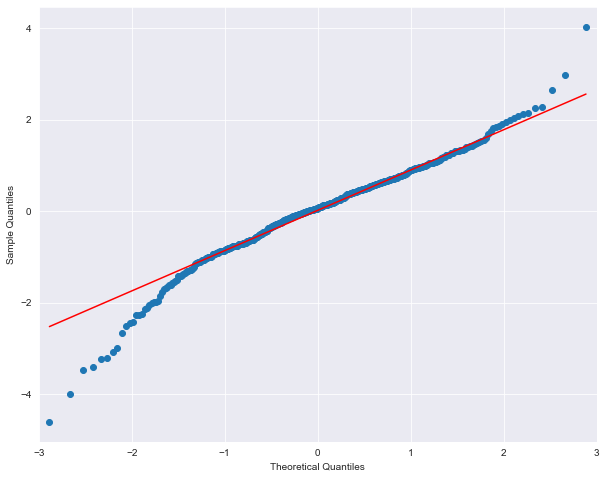

In [85]:
plt.figure(figsize=(4,4))
sm.qqplot((y_train - y_train_pred), fit=True, line='q',color="r")
plt.show()

**insight**

- Visulazing the Error terms using QQplot, The Error terms are normally distributed.

**5. Again Checking linear relationship between variable X and Y**


<Figure size 288x288 with 0 Axes>

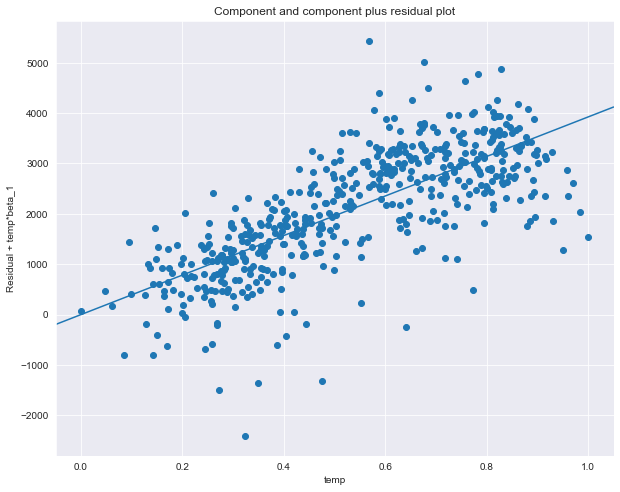

In [86]:
# Validating Linear Relationship
plt.figure(figsize=(4,4))
sm.graphics.plot_ccpr(lr_model6, 'temp')
plt.show()

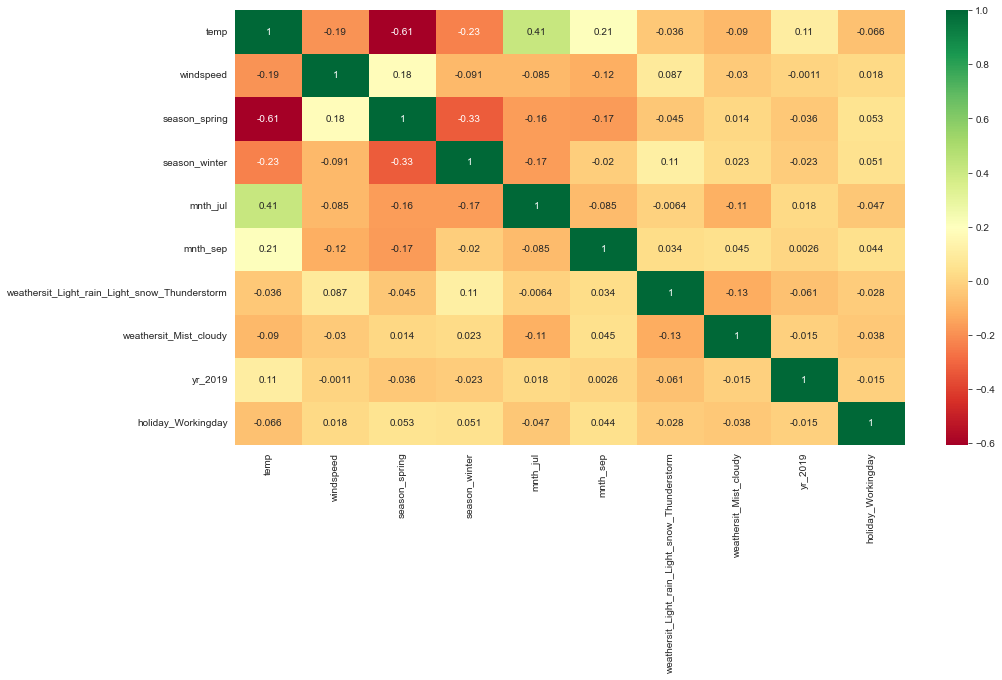

In [87]:
# cheking multicollinearity usign heatmap
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot=True, cmap="RdYlGn")
plt.show()

**insight**
- Using the pair plot, we could see there is a linear relation between **temp** and **atemp** variable with the predictor **cnt**.

## 9. Making Prediction 

**Predicting value on test dataset**

In [88]:
# Now scaling Test data on model
num_vars   #['temp', 'atemp', 'hum', 'windspeed']

# test data to be transformed with fitting
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [89]:
# predict the value
f_cols = ['temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sep', 'weathersit_Light_rain_Light_snow_Thunderstorm',
       'weathersit_Mist_cloudy', 'yr_2019', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'holiday_Workingday', 'workingday_Non-Holiday']

y_test_pred = lr.predict(X_test[f_cols])

In [90]:
y_test_pred

array([ 3629.02362865,  7853.40139094,  3620.47849138,  5514.64504526,
        5335.27036123,  3862.90892577,  4344.60395778,  3883.31448822,
        6304.67689839,  4865.72027796,  7128.39507675,  6000.29516435,
        4288.40774198,  6293.98625682,  1065.75421123,  7091.97789005,
        5450.48182985,  1362.53625214,  5281.76912263,  5159.15482602,
        7399.53723347,  5224.99163577,  7041.95197744,  1130.3902039 ,
        3444.81095955,  4662.46166387,  7325.17044058,  4390.65266345,
        7457.94303096,  4196.7249163 ,  7026.13604692,  6314.12319147,
        4255.66753481,  5251.00626322,  1299.07856972,  4165.26776826,
        4558.34193846,  6251.0532202 ,  1049.2249526 ,  3843.64504122,
        4279.97969229,  3037.41261375,  5748.93053552,  5382.83723609,
        5647.85957668,  7123.5540986 ,  1797.3802231 ,  5330.46191959,
        4949.67639426,  2198.26973033,  6884.70080759,  3998.61759401,
        4865.28027266,  7557.52079214,  3173.78882485,  7310.87249741,
      

## 9. Evaluating the Model

### 1. R2 Score 

#### 1. R2 Score (test data)

In [91]:
#evaluating the model based on r2_score
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.8232264662215427

#### 2. R2 Score (train data)

In [92]:
#evaluating the model based on r2_score
r2_score(y_train, y_train_pred)

0.8328664237258241

Text(0, 0.5, 'y_pred')

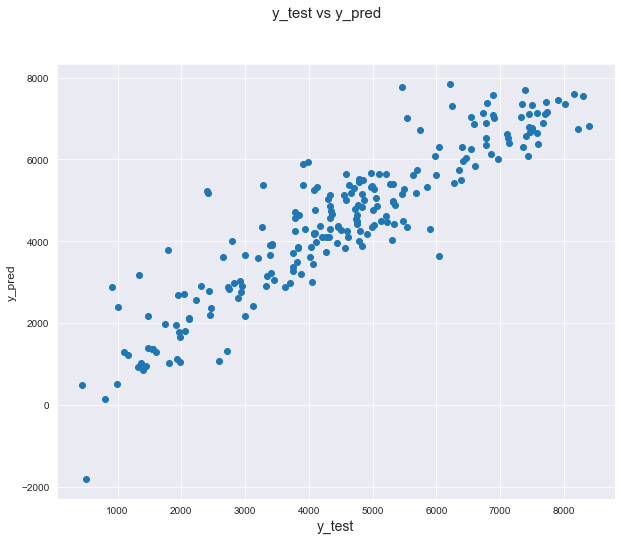

In [93]:
# Homoscedity
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

## Final Report 

In [94]:
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          1.16e-186
Time:                        14:15:39   Log-Likelihood:                -4131.1
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     499   BIC:                             8331.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          2211.5088    207.921     10.636      0.000    1803.001    2620.017
temp                                           3924.0505    265.901     14.758      0.000    3401.626    4446.475
windspeed                                     -1215.2874    218.630     -5.559      0.000   -1644.837    -785.738
season_spring                                  -963.0264    132.562     -7.265      0.000   -1223.475    -702.577
season_winter                                   410.9381    108.033      3.804      0.000     198.683     623.193
mnth_jul                                       -632.0765    151.955     -4.160      0.000    -930.628    -333.525
mnth_sep                                        501.5708    137.999      3.635      0.000     230.440     772.701
weathersit_Light_rain_Light_snow_Thunderstorm -2489.4610    216.499    -11.499      0.000   -2914.823   -2064.099
weathersit_Mist_cloudy                         -705.2053     76.804     -9.182      0.000    -856.105    -554.306
yr_2019                                        2034.7238     72.093     28.224      0.000    1893.081    2176.366
holiday_Workingday                             -856.6467    228.311     -3.752      0.000   -1305.216    -408.078
==============================================================================
Omnibus:                       58.020   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.195
Skew:                          -0.601   Prob(JB):                     9.80e-31
Kurtosis:                       5.249   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### The demand of the bike rental depend on the  FACTOR on below variables:

- **demand increase**- in the month of 1,2,3,4,5,6,7,9, yr, clear_few_cloud_weathersit, summer, fall, Holiday

- **demand decrease**- if it NON-holiday, light_snow_light_thunderstrom, misty cloud

### Final Recommendations is 

**Demand is higher in month of 2,3,4,5,6,7 and 9**